In [1]:
import json
import random
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns



In [2]:
#NEW
with open('lol_data.json', 'r') as file:
   newdata = json.load(file)

In [3]:
#NEW
newdf = pd.DataFrame(newdata)
newdf.shape

(882, 13)

In [4]:
#NEW
newdf.head()

,gameCreation,gameDuration,gameId,gameMode,gameType,gameVersion,mapId,participantIdentities,participants,platformId,queueId,seasonId,teams
0,1546074305758,873,2942016788,ARAM,MATCHED_GAME,8.24.255.8524,12,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",NA1,450,11,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T..."
1,1546072056795,1836,2942003298,CLASSIC,MATCHED_GAME,8.24.255.8524,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",NA1,400,11,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."
2,1546070609011,1023,2942000078,CLASSIC,MATCHED_GAME,8.24.255.8524,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",NA1,420,11,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."
3,1546063787803,2030,2941949842,CLASSIC,MATCHED_GAME,8.24.255.8524,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",NA1,420,11,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T..."
4,1546061423214,1930,2941921008,CLASSIC,MATCHED_GAME,8.24.255.8524,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",NA1,420,11,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."


In [5]:
#NEW
newgames = newdf[['participants','gameMode']]
newparticipants = newdf['participants']

# We only want Summoner's Rift (Classic) 
newclassicgames = newgames[newgames['gameMode'] == 'CLASSIC']['participants']

In [6]:
# NEW
newgames.head()

,participants,gameMode
0,"[{'participantId': 1, 'teamId': 100, 'champion...",ARAM
1,"[{'participantId': 1, 'teamId': 100, 'champion...",CLASSIC
2,"[{'participantId': 1, 'teamId': 100, 'champion...",CLASSIC
3,"[{'participantId': 1, 'teamId': 100, 'champion...",CLASSIC
4,"[{'participantId': 1, 'teamId': 100, 'champion...",CLASSIC


In [7]:
# Why does this run slow?

stats_keep_columns = ['participantId','win','item0','item1','item2','item3','item4','item5',
'item6','kills','deaths','assists','longestTimeSpentLiving','totalDamageDealtToChampions',
'magicDamageDealtToChampions', 'physicalDamageDealtToChampions','trueDamageDealtToChampions',
'damageDealtToTurrets','visionScore','timeCCingOthers','goldEarned','turretKills',
'perk0','perk1','perk2', 'perk3', 'perk4', 'perk5']

def create_row(row):
    '''Unpacks each list of dictionaries, from each CLASSIC game, to create a pandas row.
    Each row is organized such that the features of the winning team are displayed to the 
    left.'''
      
    a_row = []   
    for players in row:
        stats_player = pd.DataFrame.from_dict(players['stats'], orient = 'index') #Turns the dict into a pandas row
        a_row.append(stats_player.T[stats_keep_columns]) #Transposes then extracts
        champ_player = pd.DataFrame.from_dict(dict((list(players.items())[2],)), orient = 'index')
        a_row.append(champ_player.T)
        the_row = pd.concat(a_row, axis = 1)

    player_indexes = [index for index, col_name in enumerate(the_row) if col_name == 'participantId']
    if the_row.iloc[:,1].bool() == False:           
        losers = the_row.iloc[:,:player_indexes[5]]     
        the_row = pd.concat([the_row, losers], axis = 1)
        the_row = the_row.iloc[:,player_indexes[5]:]        
    the_row = the_row.drop('win',axis=1) #Drops the win columns
    return the_row 

    
newclassicwoof = newclassicgames.apply(create_row)
newclassicwoof

1        participantId item0 item1 item2 item3 item4 ...
2        participantId item0 item1 item2 item3 item4 ...
3        participantId item0 item1 item2 item3 item4 ...
4        participantId item0 item1 item2 item3 item4 ...
5        participantId item0 item1 item2 item3 item4 ...
6        participantId item0 item1 item2 item3 item4 ...
7        participantId item0 item1 item2 item3 item4 ...
8        participantId item0 item1 item2 item3 item4 ...
9        participantId item0 item1 item2 item3 item4 ...
10       participantId item0 item1 item2 item3 item4 ...
11       participantId item0 item1 item2 item3 item4 ...
12       participantId item0 item1 item2 item3 item4 ...
13       participantId item0 item1 item2 item3 item4 ...
14       participantId item0 item1 item2 item3 item4 ...
15       participantId item0 item1 item2 item3 item4 ...
16       participantId item0 item1 item2 item3 item4 ...
17       participantId item0 item1 item2 item3 item4 ...
18       participantId item0 it

In [8]:
newclassicwoof[870]

,participantId,item0,item1,item2,item3,item4,item5,item6,kills,deaths,...,timeCCingOthers,goldEarned,turretKills,perk0,perk1,perk2,perk3,perk4,perk5,championId
0,6,1054,3211,3153,3047,3078,1028,3340,11,0,...,22,7349,0,8437,8473,8429,8451,8304,8347,54


In [ ]:
chunks = []
for chunk in newclassicwoof:
        chunks.append(chunk)    
yes = pd.concat(chunks)

new_names = []
player_indexes = [index for index, col_name in enumerate(yes) if col_name == 'participantId']
yes = yes.drop('participantId', axis=1)

for player in range(5):
    if player != 0:
        wp = yes.iloc[:,player_indexes[player]:player_indexes[player+1]].add_prefix('WP'+str(player+1)+'_')
        new_names.append(wp)
    else:
        wp =yes.iloc[:,:player_indexes[player+1]].add_prefix('WP'+str(player+1)+'_')
        new_names.append(wp)
        
for player in range(5,10):
    if player != 9:
        lp = yes.iloc[:,player_indexes[player]:player_indexes[player+1]].add_prefix('LP'+str(player-4)+'_')
        new_names.append(lp)
    else:
        yes.iloc[:,player_indexes[player]:].add_prefix('LP'+str(player-4)+'_')

yes = pd.concat(new_names, axis=1)
yes.reset_index(drop=True).head()

In [9]:
#### Need to fix this 

chunks = []
for chunk in newclassicwoof:
    chunks.append(chunk)    
yes = pd.concat(chunks)

player_indexes = [index for index, col_name in enumerate(yes) if col_name == 'participantId']
yes = yes.drop('participantId', axis=1)

wp_1 = yes.iloc[:,:player_indexes[1]].add_prefix('WP1_')
wp_2 = yes.iloc[:,player_indexes[1]:player_indexes[2]].add_prefix('WP2_')
wp_3 = yes.iloc[:,player_indexes[2]:player_indexes[3]].add_prefix('WP3_')
wp_4 = yes.iloc[:,player_indexes[3]:player_indexes[4]].add_prefix('WP4_')
wp_5 = yes.iloc[:,player_indexes[4]:player_indexes[5]].add_prefix('WP5_')

lp_1 = yes.iloc[:,player_indexes[5]:player_indexes[6]].add_prefix('LP1_')
lp_2 = yes.iloc[:,player_indexes[6]:player_indexes[7]].add_prefix('LP2_')
lp_3 = yes.iloc[:,player_indexes[7]:player_indexes[8]].add_prefix('LP3_')
lp_4 = yes.iloc[:,player_indexes[8]:player_indexes[9]].add_prefix('LP4_')
lp_5 = yes.iloc[:,player_indexes[9]:].add_prefix('LP5_')

new_names = [wp_1, wp_2, wp_3, wp_4, wp_5, lp_1, lp_2, lp_3, lp_4, lp_5]
yes = pd.concat(new_names, axis=1)
yes.reset_index(drop=True).head()

,WP1_item0,WP1_item1,WP1_item2,WP1_item3,WP1_item4,WP1_item5,WP1_item6,WP1_kills,WP1_deaths,WP1_assists,...,LP5_timeCCingOthers,LP5_goldEarned,LP5_turretKills,LP5_perk0,LP5_perk1,LP5_perk2,LP5_perk3,LP5_perk4,LP5_perk5,LP5_championId
0,3040,3020,3285,1056,3135,0,3363,11,1,6,...,23,9299,0,8128,8143,8138,8105,9111,8014,64
1,2003,0,1052,1001,3285,1056,3340,1,1,4,...,10,4296,0,8010,9111,9104,8014,8304,8352,24
2,2031,3143,3050,3401,3047,2055,3364,3,8,22,...,2,12123,0,8359,8304,8345,8352,8473,8446,420
3,3020,3146,3157,3113,0,0,3340,5,7,6,...,36,11961,1,8112,8139,8136,8106,8446,8473,555
4,3222,3107,3098,3041,3504,3111,3363,3,10,31,...,19,13122,1,8112,8143,8138,8106,8236,8224,245


In [10]:
#TEAM DATA

agg = ['kills', 'deaths', 'assists', 'physicalDamageDealtToChampions', 'magicDamageDealtToChampions',
       'trueDamageDealtToChampions','totalDamageDealtToChampions', 'timeCCingOthers', 'visionScore',
       'longestTimeSpentLiving', 'goldEarned', 'damageDealtToTurrets']

team = pd.DataFrame()

for feature in agg: 
    team['Win_'+ feature] = yes[[col for col in yes.columns if 'WP' in col and feature in col]].sum(axis=1)
    team['Lose_'+ feature] = yes[[col for col in yes.columns if 'LP' in col and feature in col]].sum(axis=1)
team['TurretDamageDiff'] = team['Win_damageDealtToTurrets'] - team['Lose_damageDealtToTurrets']
team.reset_index(drop=True).head()

,Win_kills,Lose_kills,Win_deaths,Lose_deaths,Win_assists,Lose_assists,Win_physicalDamageDealtToChampions,Lose_physicalDamageDealtToChampions,Win_magicDamageDealtToChampions,Lose_magicDamageDealtToChampions,...,Lose_timeCCingOthers,Win_visionScore,Lose_visionScore,Win_longestTimeSpentLiving,Lose_longestTimeSpentLiving,Win_goldEarned,Lose_goldEarned,Win_damageDealtToTurrets,Lose_damageDealtToTurrets,TurretDamageDiff
0,35.0,19.0,14.0,53.0,51.0,14.0,19575.0,31935.0,60725.0,17582.0,...,110.0,152.0,74.0,3174.0,3258.0,59728.0,46428.0,25144.0,6944.0,18200.0
1,21.0,7.0,4.0,28.0,23.0,9.0,21335.0,5745.0,14970.0,11061.0,...,25.0,58.0,36.0,2073.0,1777.0,38943.0,21630.0,26203.0,131.0,26072.0
2,45.0,40.0,35.0,64.0,76.0,67.0,56356.0,79690.0,67135.0,30573.0,...,109.0,176.0,138.0,3307.0,2065.0,67959.0,61023.0,19576.0,8315.0,11261.0
3,37.0,32.0,25.0,49.0,46.0,35.0,71227.0,68976.0,25272.0,8537.0,...,114.0,165.0,139.0,3847.0,3544.0,67811.0,58862.0,28886.0,9951.0,18935.0
4,51.0,60.0,43.0,76.0,88.0,59.0,107904.0,83768.0,45334.0,63939.0,...,199.0,130.0,175.0,2361.0,2190.0,73771.0,66039.0,24600.0,15711.0,8889.0


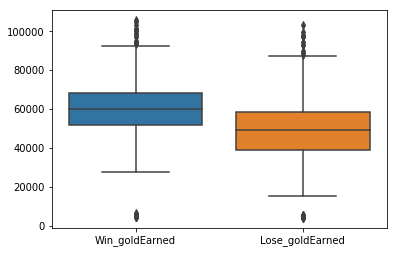

In [11]:
sns.boxplot(data=team[['Win_goldEarned','Lose_goldEarned']]);

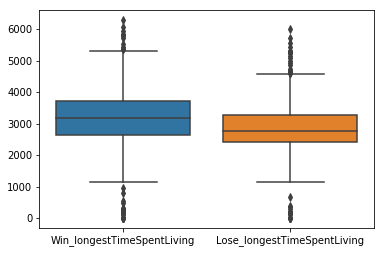

In [12]:
sns.boxplot(data=team[['Win_longestTimeSpentLiving','Lose_longestTimeSpentLiving']]);

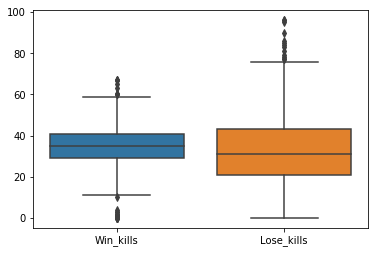

In [13]:
sns.boxplot(data=team[['Win_kills','Lose_kills']]);

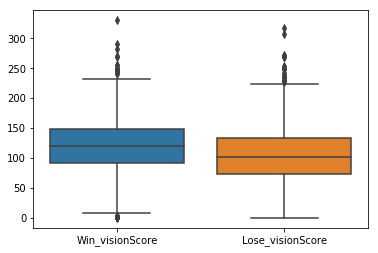

In [14]:
sns.boxplot(data=team[['Win_visionScore','Lose_visionScore']]);

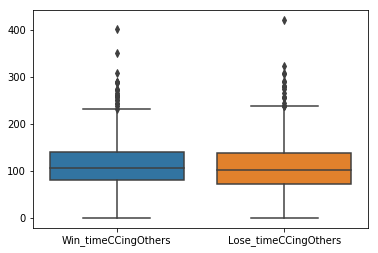

In [15]:
sns.boxplot(data=team[['Win_timeCCingOthers','Lose_timeCCingOthers']]);

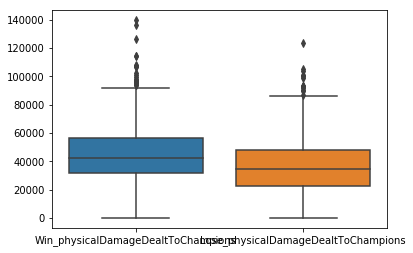

In [16]:
sns.boxplot(data=team[['Win_physicalDamageDealtToChampions','Lose_physicalDamageDealtToChampions']]);

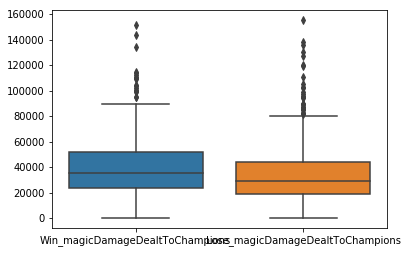

In [17]:
sns.boxplot(data=team[['Win_magicDamageDealtToChampions','Lose_magicDamageDealtToChampions']]);

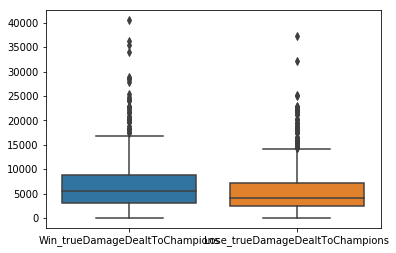

In [18]:
sns.boxplot(data=team[['Win_trueDamageDealtToChampions','Lose_trueDamageDealtToChampions']]);

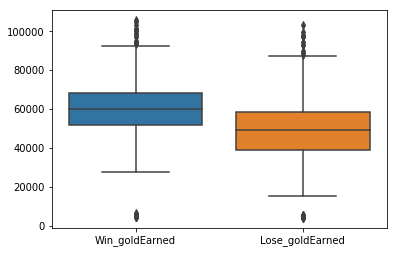

In [19]:
sns.boxplot(data=team[['Win_goldEarned','Lose_goldEarned']]);

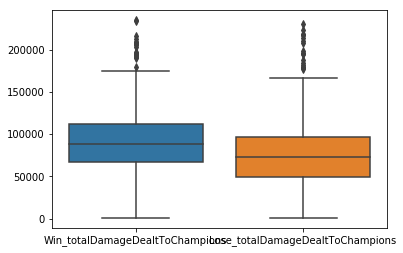

In [20]:
sns.boxplot(data=team[['Win_totalDamageDealtToChampions','Lose_totalDamageDealtToChampions']]);

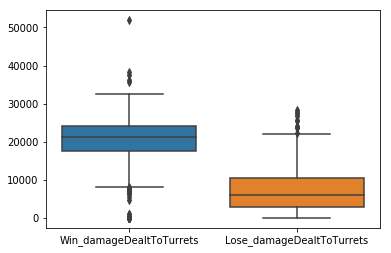

In [21]:
sns.boxplot(data=team[['Win_damageDealtToTurrets','Lose_damageDealtToTurrets']]);

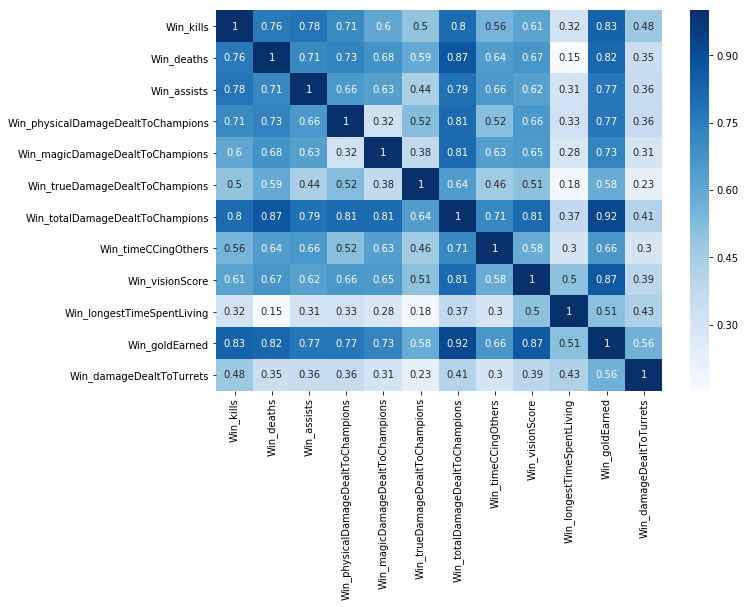

In [22]:
winners = team[[col for col in team.columns if 'Win' in col]]

plt.figure(figsize=(10, 7))
sns.heatmap(winners.corr(), annot=True, cmap='Blues');              

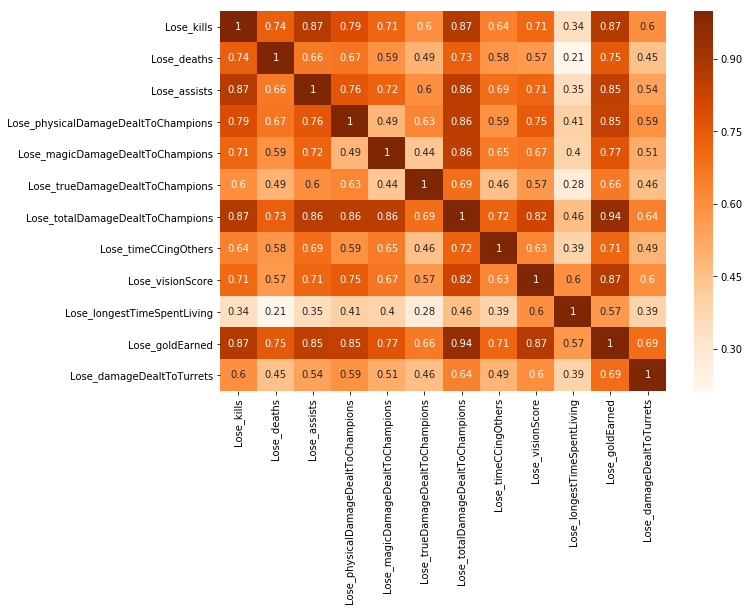

In [23]:
losers = team[[col for col in team.columns if 'Lose' in col]]

plt.figure(figsize=(10, 7))
sns.heatmap(losers.corr(), annot=True, cmap='Oranges');  

/Users/lucasfriedman/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


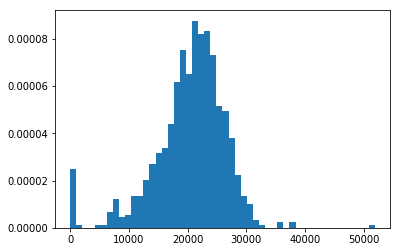

In [24]:
plt.hist(team['Win_damageDealtToTurrets'],bins=50, normed=True);


In [26]:
# Extracting games that include one or more turret hard hitters 

url_champ = 'http://ddragon.leagueoflegends.com/cdn/8.24.1/data/en_US/champion.json'
champion_info = requests.get(url_champ).json()

url_rune = 'http://ddragon.leagueoflegends.com/cdn/8.24.1/data/en_US/runesReforged.json'
rune_info = requests.get(url_rune).json()

In [27]:
champion_info['data']

{'Aatrox': {'version': '8.24.1',
  'id': 'Aatrox',
  'key': '266',
  'name': 'Aatrox',
  'title': 'the Darkin Blade',
  'blurb': 'Once honored defenders of Shurima against the Void, Aatrox and his brethren would eventually become an even greater threat to Runeterra, and were defeated only by cunning mortal sorcery. But after centuries of imprisonment, Aatrox was the first to find...',
  'info': {'attack': 8, 'defense': 4, 'magic': 3, 'difficulty': 4},
  'image': {'full': 'Aatrox.png',
   'sprite': 'champion0.png',
   'group': 'champion',
   'x': 0,
   'y': 0,
   'w': 48,
   'h': 48},
  'tags': ['Fighter', 'Tank'],
  'partype': 'Blood Well',
  'stats': {'hp': 580,
   'hpperlevel': 80,
   'mp': 0,
   'mpperlevel': 0,
   'movespeed': 345,
   'armor': 33,
   'armorperlevel': 3.25,
   'spellblock': 32.1,
   'spellblockperlevel': 1.25,
   'attackrange': 175,
   'hpregen': 5,
   'hpregenperlevel': 0.25,
   'mpregen': 0,
   'mpregenperlevel': 0,
   'crit': 0,
   'critperlevel': 0,
   'attackda

In [28]:
# key_to_champ: Dictionary with the championID as keys and champion name as values  

champ_list = list(champion_info['data'].keys())

champ_keys = []
for champ in champ_list:
    key = champion_info['data'][champ]['key']
    champ_keys.append(int(key))
champ_keys

champ_to_key = dict(zip(champ_list, champ_keys))

list(champ_to_key.items())[:10] #The 'head' of the dictionary

[('Aatrox', 266),
 ('Ahri', 103),
 ('Akali', 84),
 ('Alistar', 12),
 ('Amumu', 32),
 ('Anivia', 34),
 ('Annie', 1),
 ('Ashe', 22),
 ('AurelionSol', 136),
 ('Azir', 268)]

In [29]:
champ_to_key['Ziggs']

115

In [30]:
# key_to_rune: Dictionary with the RuneID as keys and rune name as values

rune_to_key = {}

for rune_path in rune_info:
    for rune_line in rune_path['slots']:
        for rune in rune_line['runes']:
            rune_to_key[rune['key']] = rune['id']
            
list(rune_to_key.items())[:10] #The 'head' of the dictionary

[('Electrocute', 8112),
 ('Predator', 8124),
 ('DarkHarvest', 8128),
 ('HailOfBlades', 9923),
 ('CheapShot', 8126),
 ('TasteOfBlood', 8139),
 ('SuddenImpact', 8143),
 ('ZombieWard', 8136),
 ('GhostPoro', 8120),
 ('EyeballCollection', 8138)]

In [31]:
# To go over the appropriate columns
champ_indexes = [col for col in yes.columns if 'championId' in col]  

champ_columns = yes[champ_indexes].reset_index(drop=True)
champ_columns.head()

,WP1_championId,WP2_championId,WP3_championId,WP4_championId,WP5_championId,LP1_championId,LP2_championId,LP3_championId,LP4_championId,LP5_championId
0,45,35,103,516,40,223,51,78,7,64
1,103,81,27,80,222,18,102,4,267,24
2,89,245,145,77,2,120,236,34,412,420
3,55,141,18,497,23,5,236,58,157,555
4,16,236,45,75,120,412,81,86,19,245


In [32]:
#Generate a sample of games that Does have Tristana
turrets = ['Win_damageDealtToTurrets','Lose_damageDealtToTurrets','TurretDamageDiff']

trist_index = []
for index, row in champ_columns.iterrows():
    for key in row:
        if key == champ_to_key['Tristana']:
            trist_index.append(index)
            break 

trist_games = team[turrets].reset_index(drop=True).iloc[trist_index,:]
trist_games = trist_games[~np.all(trist_games == 0, axis=1)]
trist_games.head()

,Win_damageDealtToTurrets,Lose_damageDealtToTurrets,TurretDamageDiff
1,26203.0,131.0,26072.0
3,28886.0,9951.0,18935.0
11,19903.0,6508.0,13395.0
12,23936.0,6850.0,17086.0
21,28514.0,10438.0,18076.0


In [33]:
#Generate a sample of games that does NOT have Tristana

random.seed(42)

all_game_indexes = list(yes.reset_index(drop=True).index.values)
notrist_index = list(set(all_game_indexes) - set(trist_index))

sample_notrist_index = np.random.choice(notrist_index, size = len(trist_index))
notrist_games = team[turrets].reset_index(drop=True).iloc[sample_notrist_index,:]

notrist_games = notrist_games[~np.all(notrist_games == 0, axis=1)]
notrist_games.head()

,Win_damageDealtToTurrets,Lose_damageDealtToTurrets,TurretDamageDiff
235,24416.0,17286.0,7130.0
76,21258.0,18521.0,2737.0
258,24099.0,6756.0,17343.0
566,9548.0,5343.0,4205.0
441,19674.0,781.0,18893.0


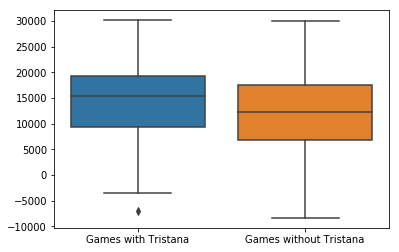

In [34]:
sns.boxplot(data=[trist_games['TurretDamageDiff'],notrist_games['TurretDamageDiff']]);
plt.xticks([0,1],['Games with Tristana','Games without Tristana']);

In [37]:
#Prepping for z-test

trist = trist_games['TurretDamageDiff']
notrist = notrist_games['TurretDamageDiff']

mean_trist = np.mean(trist)
mean_notrist = np.mean(notrist)

mean_diff = mean_trist - mean_notrist

var_trist = np.var(trist)
var_notrist = np.var(notrist)

var_diff = var_trist**2/len(trist)+var_notrist**2/len(notrist)
std_diff = var_diff**0.5
std_diff

6266147.629388067

In [36]:
alpha = 0.05
z_critical = sp.stats.norm.ppf(1-alpha)
z_critical

critical_mean_diff = z_critical*std_diff
print(critical_mean_diff)
print(mean_diff)

10306895.655212332
1922.7083298866728
